# SETUP BLOCK - Just run it

Format notes:
*   `encoder` is an array of all numbers 0-9
*   `x_train, y_train` is the training data
*   `x_test, y_test` is the testing data -- this will most commonly be used
*   `x_valid, y_valid` is the validation data



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from random import uniform

(x_t, y_t), (x_st, y_st) = tf.keras.datasets.mnist.load_data() # Imports MNIST Dataset, automatically divides up the set itself

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  # Create confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Beautify
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )

  # Set xlabels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Lable Size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Thresholding
  threshold = (cm.max() + cm.min())/2

  # Plot text on cells
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i, j] > threshold else "black",
            size = text_size
            )

In [ ]:
# Convert labels: One-Hot Encoded
encoder = tf.one_hot(indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], depth = 10)
out = []
for val in y_st:
  out.append(encoder[val])
y_test = tf.convert_to_tensor(out)
out = []
for val in y_t:
  out.append(encoder[val])
y_train = tf.convert_to_tensor(out)

In [ ]:
x_train_expanded = tf.expand_dims(x_t, -1)
x_train_bigger = tf.image.resize(x_train_expanded, (32, 32))
x_train = tf.squeeze(x_train_bigger)/255.
x_test_expanded = tf.expand_dims(x_st, -1)
x_test_bigger = tf.image.resize(x_test_expanded, (32, 32))
x_test = tf.squeeze(x_test_bigger)/255.

#Split test for validation
x_valid = x_test[-500:]
y_valid = y_test[-500:]

x_test = x_test[:-500]
y_test = y_test[:-500]

# Microset
x_train_10percent = x_train[:int(len(x_train)/10)]
y_train_10percent = y_train[:int(len(y_train)/10)]

# CREATE/SAVE CONTROL
Trains EffNet B0 - Set Seed 23. Run once, ever.

In [ ]:
# EffNet-B0 Model
tf.random.set_seed(23)

input_shape = (32, 32, 1)
base_model = tf.keras.applications.EfficientNetB0(input_shape = (32, 32, 3), include_top=False)
base_model.trainable = True

inputs=layers.Input(shape=input_shape, name = "Input_Layer")
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

control = keras.Model(inputs, outputs)

control.compile(loss = "categorical_crossentropy",
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["accuracy"])

# Fit
control_hist = control.fit(x_train_10percent, y_train_10percent,
                           epochs = 4,
                           validation_data = (x_valid, y_valid))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 21ms/step - accuracy: 0.8737 - loss: 0.4216 - val_accuracy: 0.4140 - val_loss: 2.1676
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9713 - loss: 0.1085 - val_accuracy: 0.2820 - val_loss: 4.1703
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9776 - loss: 0.0835 - val_accuracy: 0.8740 - val_loss: 0.4098
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9829 - loss: 0.0635 - val_accuracy: 0.2820 - val_loss: 2.6457


In [ ]:
control_hist = control.fit(x_train, y_train,
                           epochs = 4,
                           validation_data = (x_valid, y_valid))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9852 - loss: 0.0539 - val_accuracy: 0.3420 - val_loss: 4.1269
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9866 - loss: 0.0529 - val_accuracy: 0.9120 - val_loss: 0.2999
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9890 - loss: 0.0394 - val_accuracy: 0.8980 - val_loss: 0.3456
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9897 - loss: 0.0390 - val_accuracy: 0.8480 - val_loss: 0.5185


In [ ]:
control.save("/content/drive/MyDrive/ECE570_PROJECT/control_DEF.keras", overwrite=True)

# LOAD CONTROL MODEL
Loads pretrained EffNet B0.

In [ ]:
control = tf.keras.models.load_model("/content/drive/MyDrive/ECE570_PROJECT/control_DEF.keras", )

In [ ]:
control.evaluate(x_test, y_test)

297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9251 - loss: 0.2779


[0.26047950983047485, 0.9308421015739441]

# GNA Creation

Applies Gaussian noise to input, then pipes out the output immediately.

For GNA, the hostile element will be `x_gna`
Currently the corruption level is e = 0.1.
Because RNG is involved, set_seed = 23

In [ ]:
tf.random.set_seed(23)
x_temp = x_test
e = 0.1
gna = layers.GaussianNoise(e)
x_gna = gna(x_temp, training=True)

# GNA Test
Results: Good. Small accuracy decrease, which isn't truly adversarial, but this would be unacceptable for a mail volume of 10,000 per shift.

Consider that this is a 7% decrease. This means 700 packages more get lost per shift - 8hrs. Imagine if an important check or something got lost in the mail -- would you want to be that 7%? That would be around 2 people per 25 -- count the class! Two of these people would have a lost package!

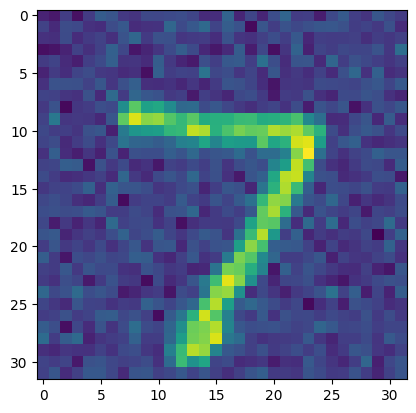

In [ ]:
plt.imshow(x_gna[0])

In [ ]:
control.evaluate(x_gna, y_test)

297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8650 - loss: 0.5114


[0.4858303368091583, 0.8755789399147034]

In [ ]:
y_gna = control.predict(x_gna)
y_gna = np.argmax(y_gna, axis=1)
truelabels = np.argmax(y_test, axis=1)

297/297 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


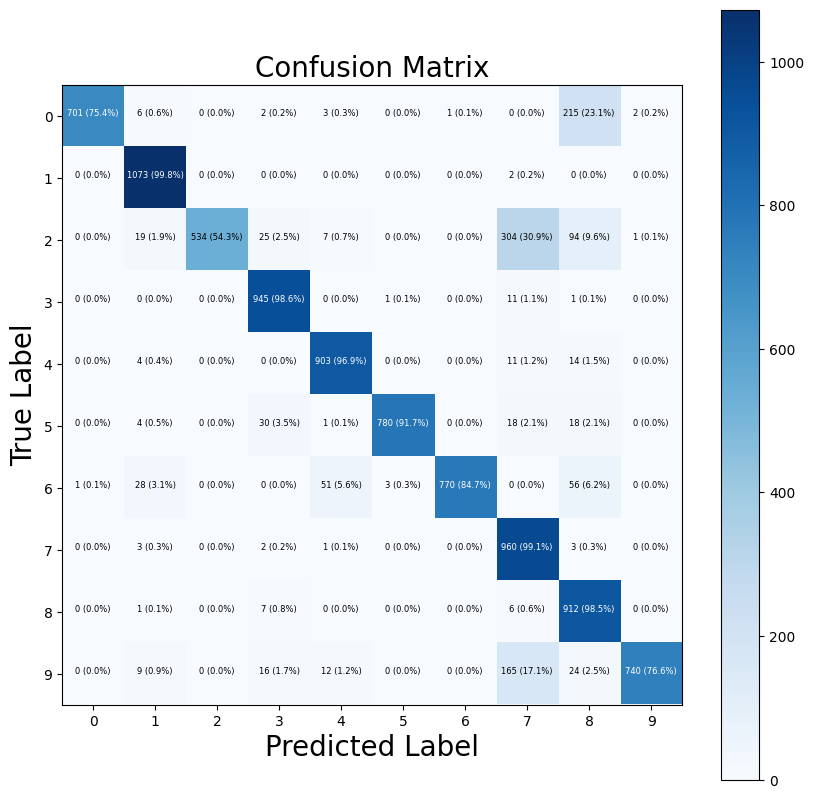

In [ ]:
make_confusion_matrix(truelabels, y_gna, text_size = 6)

# SQUARE ATTACK SETUP

Ideally run once, ever. Creates 100 Square Attack samples because 10,000 takes a REALLY long time.

Notes:
- Regular Square Attack may not get all images to be adversarial. This is expected.
- Relaxed Square Attack (aka Square Attack Bad) removes the need for total disturbance delta to be within epsilon-norm.
- Relaxed pretty much WILL get an image to be adversarial, but some images are more naturally resilient.
- Actually very powerful, but the results seem to be a little obvious with Relaxed Square
- Likely better when all color channels are available, as on grayscale MNIST Relaxed Square is very visible

In [ ]:
def squareSize(p_init, num_it, n_iters, img_size):
  '''
  Helper function for Square Attack based on the scheduler used by Andriuschenko.
  Idea is to get a percentage of the square to change, and then change the closest whole integer
  We'll actually calculate the square side length HERE instead of out in square_attack
  '''
  it = int(num_it / n_iters * 5000)

  if 75 < it <= 250:
      p = p_init / 2
  elif 250 < it <= 500:
      p = p_init / 4
  elif 500 < it <= 1500:
      p = p_init / 8
  elif 1500 < it <= 3000:
      p = p_init / 16
  elif 3000 < it <= 5000:
      p = p_init / 32
  else:
      p = p_init

  lenSide = img_size[1]

  h = np.ceil(lenSide*p)

  return h

def choose_adversarial(model, images, labels):
  '''
  Finds the second-highest accuracy label. Label is accepted in form of an integer.
  '''
  adv = labels.numpy()
  labs = tf.argmax(labels, axis=1)
  loss = float("inf")
  img = images
  lab = labs

  for i in range(10):
    if i == lab:
      continue
    temp, dump = model.evaluate(img, tf.expand_dims(encoder[i], axis=0), verbose=None)
    if temp < loss:
      adv = encoder[i]
      loss = temp
  return tf.expand_dims(adv, axis=0)

In [ ]:
def p_LINF(e, h, w):
  '''
  Inputs:
  e - Epsilon, maximal norm
  h - window size
  w - image size

  Algorithm:
  1. Randomly choose square region on the image
  2. Perturb every pixel in the region by a uniform amount
  3. Really, that's it
  '''
  # Choose a square
  imgSize = w[1]
  sqX = 0
  sqY = 0
  if imgSize != int(h):
    sqX = tf.random.uniform((), 0, imgSize-h, dtype=tf.dtypes.int32)
    sqY = tf.random.uniform((), 0, imgSize-h, dtype=tf.dtypes.int32)

  # Perturbation magnitude
  delta = np.zeros(w)
  rho = tf.random.uniform((), -2, 2) #rho rho fight the math.power

  # Perturb shape
  H = int(h)
  delta[0, sqX:sqX+H, sqY:sqY+H] = delta[0, sqX:sqX+H, sqY:sqY+H] + tf.math.sign(rho)*e*2

  return tf.convert_to_tensor(delta, dtype=tf.float32)


In [ ]:
from tqdm import tqdm
import gc
def square_attack(model, image, img_size, label, epsilon = 0.25, iterations = 2500, p_init = 1.0, adv_bound = 0.6):
  '''
  Implements Square Attack from https://github.com/max-andr/square-attack/tree/master
  Custom implementation, but borrows many utilities and functions from the code as it is essentially the same
  Assumes we only have a single color channel.

  Currently uses L-Inf norm as that seems like the easier one to implement naively, while L2-norm P seems like a terrible time.

  model     - Target tf.Model
  image     - Input image to be made adversarial wrt. Model -- assume it is square
  label     - True Label as an integer. Making an image "true label" adversarial makes no sense, so this is used for choose_adversarial()
  img_size  - Mostly as a convenience factor, insert as (width, height) but MNIST comes square typically
  epsilon   - Max percentage perturbation on image allowed.
  iterations- Max iterations allowed for Square Attack. We set 1k iters because paper typically acheives adversarial in mean:300 med:120 queries assuming well-set epsilons
  p_init    - Initial square size percentage, defaults to 0.75 for something between speed and results
  adv_bound - Minimum "safe prediction" bound.

  Internal Use
  y - Set as the lowest-loss label that isn't the true label.
  All other numbers set because we want to mirror the original algorithm
  '''

  # Needs this
  tf.random.set_seed(23)
  x = image
  N = iterations
  y = choose_adversarial(model, image, label)
  e = epsilon
  w = img_size
  f = model
  delta = np.zeros(img_size)

  loss, acc = model.evaluate(x, y, verbose = None)

  for i in range(N):
    # Obtain square size
    h = squareSize(p_init, i, N, w)

    # Obtain delta, x_hat
    delta_hat = delta
    perturb = p_LINF(e, h, w)
    delta_hat = delta + perturb
    norm_del = tf.norm(np.inf)
    if norm_del > epsilon:
      delta_hat = delta_hat*epsilon/norm_del
    x_hat = x + delta_hat

    # Normalize x_hat to [0.0, 1.0]
    lowest = tf.minimum(tf.reduce_min(x_hat), 0)
    x_hat = x_hat-lowest # All is now > 0
    x_hat = (x_hat/tf.reduce_max(x_hat)) # All is now 0 - 1

    # Update loss
    loss_temp, acc = model.evaluate(x_hat, y, verbose = None)
    if loss_temp < loss:
      loss = loss_temp
      delta = delta_hat
    # Exit if all x are now adversarial - We'll set that threshold to 0.6 by default for more interesting results
    if acc > adv_bound:
      break

  return x_hat

def square_attack_wrong(model, image, img_size, label, epsilon = 0.01, iterations = 5000, p_init = 1.0, adv_bound = 0.6):
  '''
  Implements Square Attack from https://github.com/max-andr/square-attack/tree/master in the WRONG way.
  Essentially, it relaxes the epsilon-bound. Otherwise similar.
  '''

  # Needs this
  tf.random.set_seed(23)
  x = image
  x_hat = x
  N = iterations
  y = choose_adversarial(model, image, label)
  e = epsilon
  w = img_size
  f = model
  delta = np.zeros(img_size)

  loss, acc = model.evaluate(x, y, verbose = None)

  for i in range(N):
    # Obtain square size
    h = squareSize(p_init, i, N, w)

    # Obtain delta, x_hat

    x_hat = x + p_LINF(e, h, w)

    # Normalize x_hat to true range
    lowest = tf.minimum(tf.reduce_min(x_hat), 0)
    x_hat = x_hat-lowest # All is now > 0
    x_hat = (x_hat/tf.reduce_max(x_hat))

    # Update loss
    loss_temp, acc = model.evaluate(x_hat, y, verbose = None)
    if loss_temp < loss:
      loss = loss_temp
      x = x_hat
    # Exit if all x are now adversarial - We'll set that threshold to 0.6 by default for more interesting results
    if acc > adv_bound:
      break

  return x_hat

In [ ]:
from tqdm import tqdm
import progressbar
tf.random.set_seed(23) # Always 23

start = 1
end = start+100
batchsize = 1
batches = 100
x_Square = x_test[start:end].numpy()
for i in tqdm(range(batches), desc = "[PLEASE WAIT: PREPARE SOME TEA]"):
  x_Square[i] = square_attack(control, tf.expand_dims(x_Square[i],axis=0), (1, 32, 32), tf.expand_dims(y_test[i+start],axis=0))
# And save!
np.save("/content/drive/MyDrive/ECE570_PROJECT/squareAttack_images_true", x_Square)

[PLEASE WAIT: PREPARE SOME TEA]:   1%|          | 1/100 [03:42<6:07:07, 222.50s/it]


KeyboardInterrupt: 

In [ ]:
start = 1
end = start+100
batchsize = 1
batches = 100
x_Square = x_test[start:end].numpy()
for i in tqdm(range(batches), desc = "[PLEASE WAIT: PREPARE SOME TEA]"):
  x_Square[i] = square_attack_wrong(control, tf.expand_dims(x_Square[i],axis=0), (1, 32, 32), tf.expand_dims(y_test[i+start],axis=0))
np.save("/content/drive/MyDrive/ECE570_PROJECT/squareAttack_images_modded", x_Square)

[PLEASE WAIT: PREPARE SOME TEA]:   1%|          | 1/100 [00:06<11:08,  6.76s/it]


KeyboardInterrupt: 

# LOAD + TEST SQUARE ATTACK

We have two versions:

- x_square is Square Attack as per Andiuschenko
- x_badSquare is Square Attack with slightly relaxed parameters -- this allows it to generate something much more adversarial, but also allows us to make more observations on how adversarial attacks try to work.

Both have similar results. However, of note is the C-M.

In [ ]:
# Load.
x_square = np.load("/content/drive/MyDrive/ECE570_PROJECT/squareAttack_images_true.npy")
# Compare with a previously rendered version
x_badSquare = np.load("/content/drive/MyDrive/ECE570_PROJECT/squareAttack_images_modded.npy")

In [ ]:
start = 1
control.evaluate(x_square, y_test[start:start+100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9816 - loss: 0.0981 


[0.11095458269119263, 0.9800000190734863]

In [ ]:
start_bad = 1
control.evaluate(x_badSquare, y_test[start_bad:start_bad+100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0596 - loss: 1.2249 


[1.1964341402053833, 0.05000000074505806]

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 838ms/step


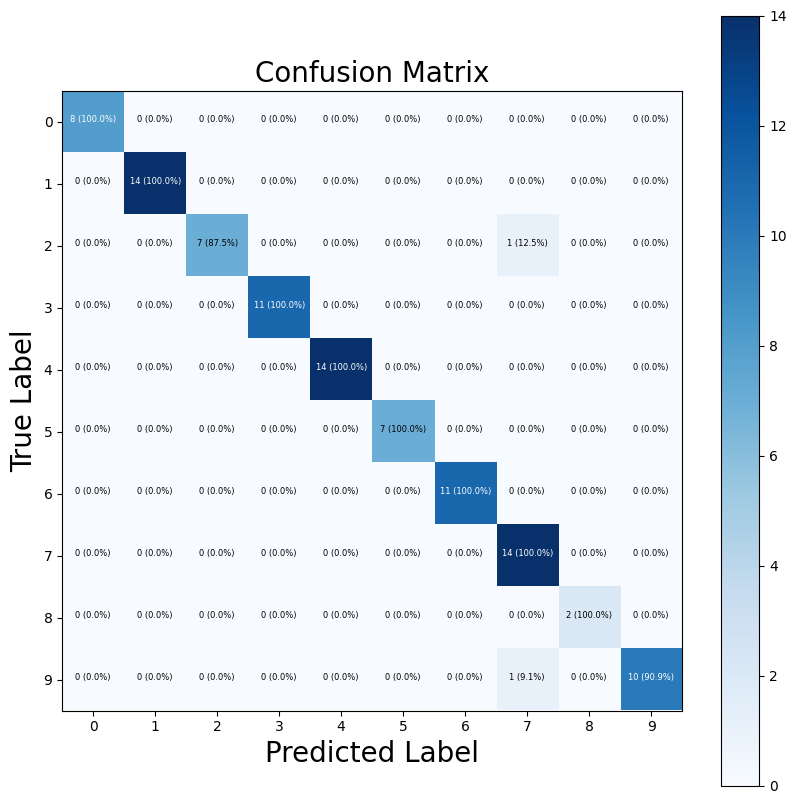

In [ ]:
y_square = control.predict(x_square)
y_square = np.argmax(y_square, axis=1)
truelabels = np.argmax(y_test[start:start+100], axis=1)
make_confusion_matrix(truelabels, y_square, text_size = 6)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


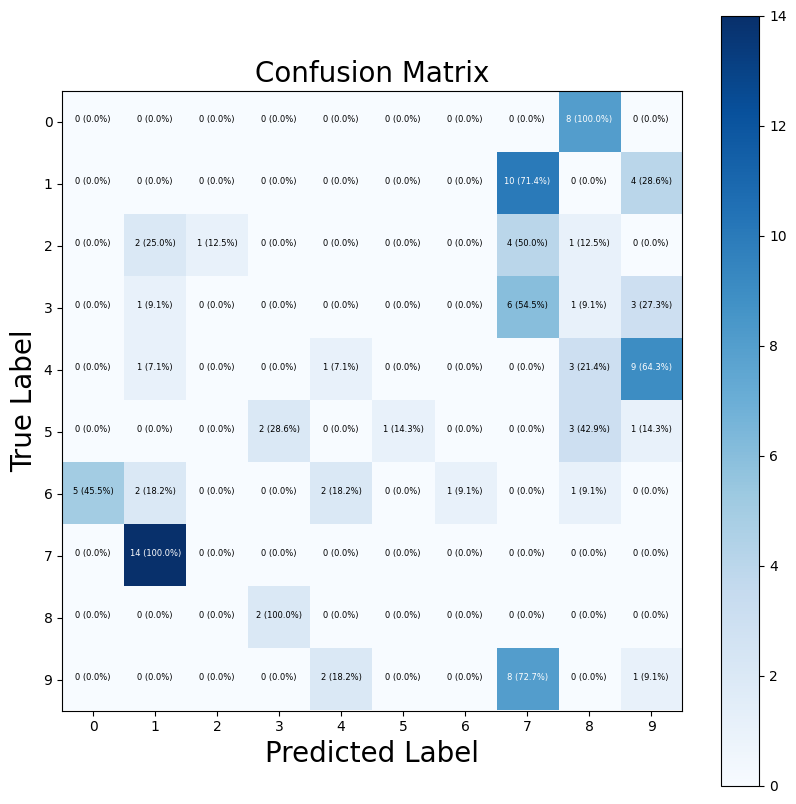

In [ ]:
y_badSquare = control.predict(x_badSquare)
y_badSquare = np.argmax(y_badSquare, axis=1)
truelabels = np.argmax(y_test[start:start+100], axis=1)
make_confusion_matrix(truelabels, y_badSquare, text_size = 6)

# A5/R TRAINING

A5/R is very simple -- we essentially train a DNN known as the Robustifier, the process of which is like this:

1.  Feed acquired image x through R, obtaining robustified z.
2.  z is then subject to an adversarial attack, creating w.
3.  We run classifier C on input w.

The way our black box attack works is that we are trying to "confuse" the neural network into believing that they are actually something else by reducing the crossentropy loss of a false label. This comes with a problem -- A5/R wants to train knowing the worst-case attack, which we do not know. What we do know, however, is how to train an AI to determine which way to reduce loss.

Crossentropy loss can be seen as increasing when the loss with respect to the predicted, true label increases; therefore, our robustifier must perform an "adversarial attack" in order to *reduce* the current loss. This is an adversarial attack used defensively, which exactly fulfills the general idea that A5/R is trying to achieve.

While this does require the assumption that a black box attack is trying to deliberately increases the loss of the true label, I believe this is a fair assumption to make for all black boxes, as categorical crossentropy loss is a statistic that should be available.

For the training of our robustifier, we may have to make a custom training loop. I am not looking forward to this.

https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

Update: I did it, now we need to scale it.

Task Difficulty: 4/5


In [ ]:
!pip3 install keras-nightly

In [ ]:
# Quick + Dirty Robustifier
# Maybe try
import keras

tf.random.set_seed(42)

input_shape = (32, 32, 1)

inputs=keras.layers.Input(shape=input_shape, name = "Robust_Input")
x = keras.layers.Conv2D(32, kernel_size=3, strides = 1, padding="same")(inputs)
x = keras.layers.ReLU()(x)
outputs = keras.layers.Conv2D(1, kernel_size=5, strides = 1, padding="same", activation = "tanh")(x)

robustifier = keras.Model(inputs, outputs)

input_shape = (32, 32, 1)

inputs=keras.layers.Input(shape=input_shape, name = "a5_Input")
x = robustifier(inputs)
x = keras.layers.Rescaling(0.025)(x)
x = keras.layers.add([inputs, x])
x = keras.layers.Rescaling(1/1.025)(x)
outputs = control(x)

a5r = keras.Model(inputs, outputs)

a5r.compile(loss = "categorical_crossentropy",
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["accuracy"])

In [ ]:
a5r.layers[-1].trainable = False

In [ ]:
# Fit
a5r_h = a5r.fit(x_train_10percent, y_train_10percent,
                epochs = 10,
                validation_data = (x_valid, y_valid))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.9337 - loss: 0.2481 - val_accuracy: 0.8700 - val_loss: 0.4429
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9385 - loss: 0.2155 - val_accuracy: 0.8740 - val_loss: 0.4320
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9403 - loss: 0.2036 - val_accuracy: 0.8780 - val_loss: 0.4260
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9418 - loss: 0.2028 - val_accuracy: 0.8780 - val_loss: 0.4239
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9440 - loss: 0.2021 - val_accuracy: 0.8780 - val_loss: 0.4222
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9437 - loss: 0.1926 - val_accuracy: 0.8820 - val_loss: 0.4200
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9434 - loss: 0.1966 - val_accuracy: 0.8820 - val_loss: 0.4181
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9443 - loss: 0.1969 - val_ac

In [ ]:
a5r.save("/content/drive/MyDrive/ECE570_PROJECT/a5r.keras", overwrite=True)


In [ ]:
robustifier.save("/content/drive/MyDrive/ECE570_PROJECT/robustifier.keras", overwrite=True)

# RUN ROBUST

In [ ]:
robustifier = tf.keras.models.load_model("/content/drive/MyDrive/ECE570_PROJECT/robustifier.keras")

In [ ]:
sample = robustifier.predict(x_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
sample.shape

(100, 32, 32, 1)

In [ ]:
sample = tf.squeeze(sample)

In [ ]:
yay = control.evaluate(sample, y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4302 - loss: 2.3659 


In [ ]:
#gnattack
tf.random.set_seed(23)
e = 0.1
gna = layers.GaussianNoise(e)
x_robust = gna(sample)

In [ ]:
control.evaluate(x_gna[1:101], y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9295 - loss: 0.2312  


[0.26061683893203735, 0.9200000166893005]

In [ ]:
control.evaluate(sample, y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4302 - loss: 2.3659 


[2.268496513366699, 0.4399999976158142]

# Open Set Defense Setup

I have tried my best to implement OSAD on Tensorflow -- and I officially declare that I don't know what I'm doing.

We are not using non-local means, we are instead using the gaussian kernel. Original OSAD uses 32x32, which is an issue for us (224x224) so we have to find a way to reduce 224x224->2x2

Update: We just remade everything in 32x32

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

def gaussian_filter(in_channels, kernel_size = 5, sig = 5):
  '''
  Returns a proper weights matrix for shenanigans
  '''
  kernel_weights = gkern(kernel_size, sig)
  kernel_weights = np.expand_dims(kernel_weights, axis=-1)
  kernel_weights = np.repeat(kernel_weights, in_channels, axis=-1)
  kernel_weights = np.expand_dims(kernel_weights, axis=-1)
  kernel_weights = np.repeat(kernel_weights, in_channels, axis=-1)
  return kernel_weights

In [ ]:
def identity_block(x, filter):
  s = x
  p = x
  # Layer 1
  p = tf.keras.layers.Conv2D(filter, 4, padding = 'same')(p)
  p = tf.keras.layers.BatchNormalization(axis=3)(p)
  p = tf.keras.layers.Activation('relu')(p)
  # Layer 2
  p = tf.keras.layers.Conv2D(filter, 4, padding='same')(p)
  p = tf.keras.layers.BatchNormalization(axis=3)(p)
  # Res
  s = tf.keras.layers.Conv2D(filter, 1)(s)
  end = tf.keras.layers.Add()([s, p])
  end = tf.keras.layers.Activation('relu')(end)
  return end

# Build Encoder
input_shape = (32, 32, 1)
kernel_size = 5
sig = 5

inputs=keras.layers.Input(shape=input_shape, name = "OSAD_Input")
x = tf.keras.layers.Conv2D(64, 3, padding = 'same')(inputs)
x = tf.keras.layers.AveragePooling2D(2)(x) # 16
x = identity_block(x, 64)
x = identity_block(x, 64)
x = tf.keras.layers.Conv2D(64, kernel_size, use_bias = 'False', padding='same',
                           kernel_initializer=tf.constant_initializer(gaussian_filter(64, 5, 1)),
                           name = "gaussian_filter1")(x)
x = tf.keras.layers.AveragePooling2D(2)(x) # 8
x = identity_block(x, 128)
x = identity_block(x, 128)
x = tf.keras.layers.Conv2D(128, 3, use_bias = 'False', padding='same',
                           kernel_initializer=tf.constant_initializer(gaussian_filter(128, 3, 1)),
                           name = "gaussian_filter2")(x)
x = tf.keras.layers.AveragePooling2D(2)(x) # 4
x = identity_block(x, 256)
x = identity_block(x, 256)
x = tf.keras.layers.AveragePooling2D(2)(x) # 2
x = identity_block(x, 512)
x = identity_block(x, 512)
x = tf.keras.layers.GlobalAveragePooling2D()(x) # 1
latent = tf.keras.layers.Reshape((512,))(x)

encoder = keras.Model(inputs, latent)

for layer in encoder.layers:
  if layer.name == "gaussian_filter1":
    layer.trainable = False
  if layer.name == "gaussian_filter2":
    layer.trainable = False
  if layer.name == "gaussian_filter3":
    layer.trainable = False

In [ ]:
# Build Decoder
inputs = keras.layers.Input(shape=(512,), name = "Decoder_Input")
x = tf.keras.layers.Dense(512*2*2)(inputs)
x = tf.keras.layers.Reshape((2, 2, 512))(x)
x = tf.keras.layers.Conv2DTranspose(512, 4, strides = 2, activation = 'leaky_relu', padding = 'same')(x) # 4x4
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2DTranspose(256, 4, strides = 2, activation = 'leaky_relu', padding = 'same')(x) # 8x8
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2DTranspose(128, 4, strides = 2, activation = 'leaky_relu', padding = 'same')(x) # 16x16
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2DTranspose(1, 4, strides = 2, activation = 'tanh', padding = 'same')(x) # 32x32
output = tf.keras.layers.BatchNormalization()(x)

decoder = keras.Model(inputs, output)

In [ ]:
# but here's the preprocessor
data_aug = keras.Sequential([
    keras.layers.GaussianNoise(0.1)
], name = "data_augmentation")

In [ ]:
input_shape = (32, 32, 1)
inputs=keras.layers.Input(shape=input_shape, name = "Noisy_input")
x = data_aug(inputs)
x = encoder(x)
outputs = decoder(x)

osad = keras.Model(inputs, outputs)

osad.compile(loss = "mse",
            optimizer = tf.keras.optimizers.Adam())

# Fit
osad_h = osad.fit(x_train_10percent, x_train_10percent,
                epochs = 10,
                validation_data = (x_valid, x_valid))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 135ms/step - loss: 0.6812 - val_loss: 0.3440
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4126 - val_loss: 0.2589
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2537 - val_loss: 0.1800
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1556 - val_loss: 0.1171
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0996 - val_loss: 0.0708
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0708 - val_loss: 0.0550
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0575 - val_loss: 0.0491
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - val_loss: 0.0521
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - val_loss: 0.0461
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - val_loss: 0.0485


In [ ]:
osad_h = osad.fit(x_train, x_train,
                epochs = 4,
                validation_data = (x_valid, x_valid))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - loss: 0.0494 - val_loss: 0.0533
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - loss: 0.0483 - val_loss: 0.0358
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0282 - val_loss: 0.0201
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0153 - val_loss: 0.0114


In [ ]:
encoder.save("/content/drive/MyDrive/ECE570_PROJECT/osad_encoder.keras", overwrite=True)
decoder.save("/content/drive/MyDrive/ECE570_PROJECT/osad_decoder.keras", overwrite=True)
osad.save("/content/drive/MyDrive/ECE570_PROJECT/osad_full.keras", overwrite=True)

# OSAD Load Encoder+Decoder

In [ ]:
osad_encoder = tf.keras.models.load_model("/content/drive/MyDrive/ECE570_PROJECT/osad_encoder.keras")
osad_decoder = tf.keras.models.load_model("/content/drive/MyDrive/ECE570_PROJECT/osad_decoder.keras")
osad = tf.keras.models.load_model("/content/drive/MyDrive/ECE570_PROJECT/osad_full.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


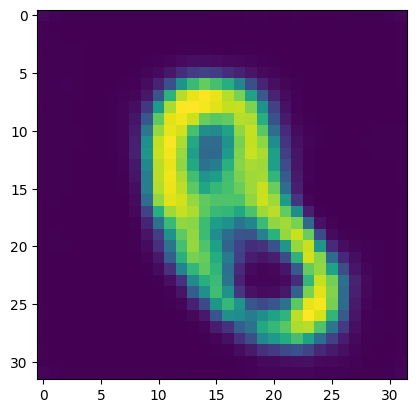

In [ ]:
exp = osad.predict(tf.expand_dims(tf.expand_dims(x_badSquare[6], axis=0), axis=-1))
plt.imshow(tf.squeeze(exp))

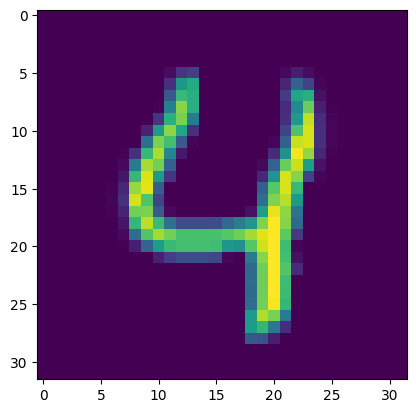

In [ ]:
plt.imshow(x_square[3])

# A5 vs Relaxed Square

We do not run A5 vs Square Attack, because Square Attack Normal could not be reproduced.

In [ ]:
x_Criteria = x_test[1:101]
y_Criteria = y_test[1:101]
x_A5 = robustifier.predict(x_Criteria)
x_A5 = tf.squeeze(x_A5)
x_A5 = tf.convert_to_tensor(x_A5).numpy()

NameError: name 'robustifier' is not defined

In [ ]:
x_A5.shape, y_Criteria.shape

In [ ]:
from tqdm import tqdm
import progressbar
tf.random.set_seed(23) # Always 23

start = 300
end = start+100
batchsize = 1
batches = 100
x_fin = x_A5
for i in tqdm(range(batches), desc = "[PLEASE WAIT: PREPARE SOME TEA]"):
  x_fin[i] = square_attack_wrong(control, tf.expand_dims(x_fin[i],axis=0), (1, 32, 32), tf.expand_dims(y_Criteria[i],axis=0))

[PLEASE WAIT: PREPARE SOME TEA]: 100%|██████████| 100/100 [4:34:40<00:00, 164.81s/it]


In [ ]:
np.save("/content/drive/MyDrive/ECE570_PROJECT/A5_vs_Square", x_fin)

In [ ]:
control.evaluate(x_fin, y_Criteria)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1635 - loss: 4.4036


[4.103626251220703, 0.1899999976158142]

In [ ]:
x_fin = np.load("/content/drive/MyDrive/ECE570_PROJECT/A5_vs_Square.npy")

#

# Save All Images For Inspection

Saves 100 images each (Test indices 300-399)

Relevant Sets:

Attackers Only
- GNA Only
- Square Attack
- Square Attack, Relaxed Params

A5
- A5 Only
- A5 -> GNA
- A5 -> Relaxed Square Attack

OSAD
- OSAD Only
- GNA -> OSAD
- Relaxed Square Attack -> OSAD

In [ ]:
x_gnA5 = gna(x_A5, training = False)

NameError: name 'x_A5' is not defined

OSAD

In [ ]:
osad_enc = osad_encoder.predict(x_test[1:101])
osad_dec = osad_decoder.predict(osad_enc)
osad_dec = tf.squeeze(osad_dec)
control.evaluate(osad_dec, y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9265 - loss: 0.3039 


[0.3890050947666168, 0.9100000262260437]

GNA to OSAD

In [ ]:
gnosad_enc = osad_encoder.predict(x_gna[1:101])
gnosad_dec = osad_decoder.predict(gnosad_enc)
gnosad_dec = tf.squeeze(gnosad_dec)
control.evaluate(gnosad_dec, y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9202 - loss: 0.3192 


[0.3996540904045105, 0.9100000262260437]

Relaxed Square to OSAD

In [ ]:
badSquare_OSAD = osad_encoder.predict(x_badSquare)
badSquare_OSAD = osad_decoder.predict(badSquare_OSAD)
badSquare_OSAD = tf.squeeze(badSquare_OSAD)
control.evaluate(badSquare_OSAD, y_test[1:101])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1114 - loss: 6.3470 


[6.065448760986328, 0.12999999523162842]

In [ ]:
x_gnaSave = tf.expand_dims(x_gna, axis=-1)
x_squaresave = tf.expand_dims(x_square, axis=-1)
x_badSquaresave = tf.expand_dims(x_badSquare, axis=-1)
#x_A5save = tf.expand_dims(x_A5, axis=-1)
#x_gnA5save = tf.expand_dims(x_gnA5, axis=-1)
#x_finsave = tf.expand_dims(x_fin, axis=-1)

osad_decsave = tf.expand_dims(osad_dec, axis=-1)
gnosad_decsave = tf.expand_dims(gnosad_dec, axis=-1)
badSquare_OSADsave = tf.expand_dims(badSquare_OSAD, axis=-1)

for i in range(100):
  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/GNA/"+str(i)+".png", x_gnaSave[i+1]) # GNA Only
  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/Square_Normal/"+str(i)+".png", x_squaresave[i]) # Square Attack
  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/Square_NonStrict/"+str(i)+".png", x_badSquaresave[i]) # Relaxed Square

  #tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/A5_Encoded/"+str(i)+".png", x_A5save[i]) # A5 Only
  #tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/A5_GNA/"+str(i)+".png", x_gnA5save[i]) # A5 -> GNA
  #tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/A5_Square_NonStrict/"+str(i)+".png", x_finsave[i]) # A5 -> Relaxed Square

  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/OSAD/"+str(i)+".png", osad_decsave[i]) # OSAD Clean Pipeline
  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/GNA_OSAD/"+str(i)+".png", gnosad_decsave[i]) # GNA -> OSAD
  tf.keras.utils.save_img("/content/drive/MyDrive/ECE570_PROJECT/images/Square_NonStrict_OSAD/"+str(i)+".png", badSquare_OSADsave[i]) # Relaxed Square -> OSAD

In [ ]:
what = control.predict(tf.expand_dims(osad_dec[19], axis = 0))
tf.argmax(what, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([9])>

In [ ]:
what = control.predict(tf.expand_dims(gnosad_dec[19], axis = 0))
tf.argmax(what, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([9])>

In [ ]:
what = control.predict(tf.expand_dims(badSquare_OSAD[19], axis = 0))
tf.argmax(what, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([8])>

In [ ]:
what  = control.predict(tf.expand_dims(x_badSquare[19], axis = 0))
tf.argmax(what, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

In [ ]:
!pip freeze > requirements.txt